In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 71.2MB/s]
Archive:  covid19-dataset-in-japan.zip
  inflating: covid_jpn_metadata.csv  
  inflating: covid_jpn_prefecture.csv  
  inflating: covid_jpn_total.csv     
  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 8.42MB/s]
Archive:  corona-virus-test-numbers-in-turkey.zip
  inflating: turkey_covid19_all.csv  
Date
2021-02-16 00:00:00+00:00     1029
2021-02-16 00:00:00+00:00      882
2021-02-16 00:00:00+00:00    17442
2021-02-16 00:00:00+00:00      995
2021-02-16 00:00:00+00:00     1585
2021-02-16 00:00:00+00:00     3418
2021-02-16 00:00:00+00:00     1267
2021-02-16 00:00:00+00:00     1937
2021-02-16 00:00:00+00:00     1738
2021-02-16 00:00:00+00:00     8008
Name: Positive, dtype: int64


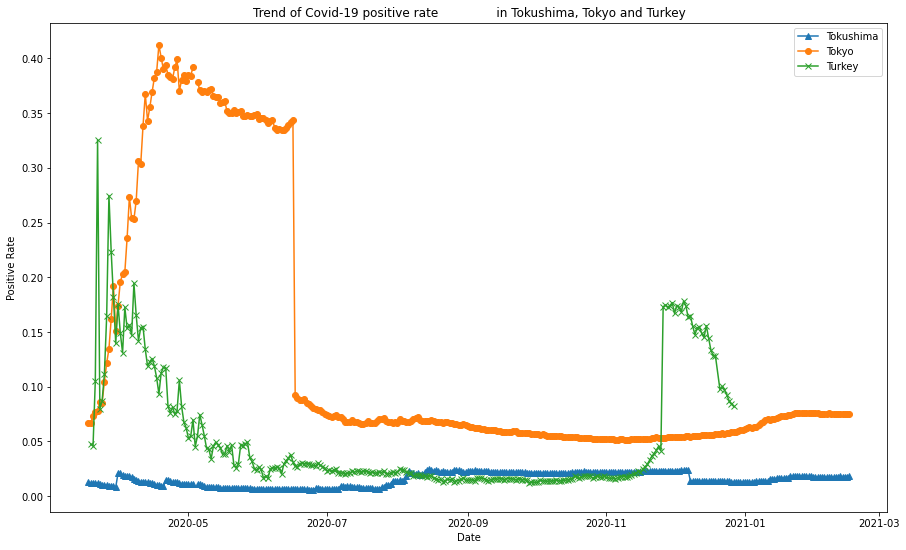

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# データの準備（covid-19の検査に関するデータ）
def prepare():
    # 日本のデータ
    !kaggle datasets download -d \
    lisphilar/covid19-dataset-in-japan
    !unzip covid19-dataset-in-japan.zip
    # トルコのデータ
    !kaggle datasets download -d \
    ocakhsn/corona-virus-test-numbers-in-turkey
    !unzip corona-virus-test-numbers-in-turkey.zip
# タイムゾーンの変換および陽性者数の時系列推移の可視化
def dt_convert():
    # 日本のcovid-19の検査数、陽性者数などのデータ
    df = pd.read_csv('covid_jpn_prefecture.csv')
    # Date列をインデックスに指定する
    df.index = pd.DatetimeIndex(df['Date'], name='Date')
    # UTCに変換
    df.index = df.index.tz_localize('UTC')
    # 最近の国内の陽性者の人数を表示してみる（UTC）
    print(df['Positive'][-10:])
    # 徳島県のデータを抽出
    kdf = df[df['Prefecture'] == 'Tokushima']
    # 徳島県の陽性率(=陽性者数/検査数)
    positive_Tokushima = pd.DataFrame(
       kdf['Positive']/kdf['Tested'], columns=['Positive'])
    plt.figure(figsize=(15,9))
    plt.plot(positive_Tokushima,  label='Tokushima',
             marker='^')
    plt.title('Trend of Covid-19 positive rate \
              in Tokushima, Tokyo and Turkey')
    plt.xlabel('Date')
    plt.ylabel('Positive Rate')
    # 東京都のデータを抽出
    tdf = df[df['Prefecture'] == 'Tokyo']
    # 東京都の陽性率(=陽性者数/検査数)
    positive_Tokyo = pd.DataFrame(
        tdf['Positive']/tdf['Tested'], columns=['Positive'])
    # グラフ表示
    plt.plot(positive_Tokyo, label='Tokyo', marker='o')
    # トルコのデータを読込み、
    # タイムゾーンをUTCに変換
    df_turkey = pd.read_csv('turkey_covid19_all.csv')
    df_turkey.index = pd.DatetimeIndex(df_turkey['Date'],
                                       name='Date')
    df_turkey.index = df_turkey.index.tz_localize('UTC')
    udf = df_turkey[df_turkey['Country/Region']=='Turkey']
    # トルコの陽性率(=陽性者数/検査数)
    # 'Confirmed'は累積数になっているので
    # 前日からの差(diff)を陽性者数として使う
    positive_Turkey = pd.DataFrame(
       udf['Confirmed'].diff()/udf['Tests'],
                             columns=['Positive'])
    # グラフ表示
    plt.plot(positive_Turkey, label='Turkey', marker='x')
    plt.legend()
    plt.savefig('Tokushima-Tokyo-Turkey.png',
                bbox_inches='tight', dpi=300) 
    plt.show()

def main():
    prepare()
    dt_convert()

if __name__ == '__main__':
    main()
    